## Esercizio 01.1
L'esercizio richiede di calcolare alcune quantità attraverso il generatore di numeri casuale fornito sul sito ariel del corso. 

1. $\langle r \rangle = \int_0^1 r dr = 1/2$.

Ho utilizzato un numero totale di lanci pari a $100000$ suddividendo tale intervallo in $100$ blocchi.

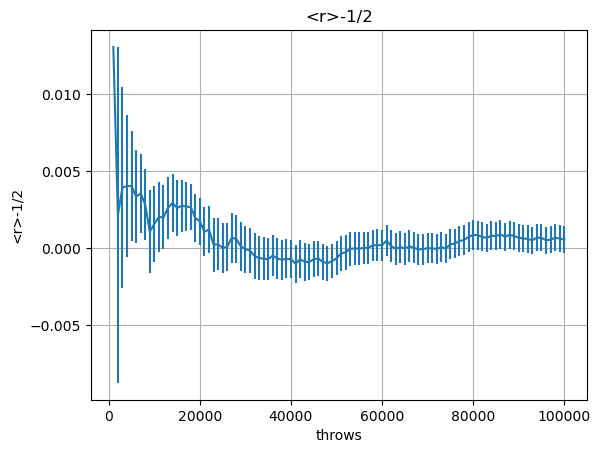

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#carico i dati
f1, x1, error1 = np.loadtxt("r.txt", delimiter=' ', unpack=True) # unpack fa sì che np.loadtxt restituisca le colonne come variabili separate invece che come un unico array 2D.
#creo il grafico
plt.figure()
plt.errorbar(x1,f1-1/2,yerr=error1)
plt.xlabel('throws')
plt.ylabel('<r>-1/2')
plt.title('<r>-1/2')
plt.grid(True)
plt.show()

Si noti come il valore finale con la sua incertezza rientra nel valore aspettato.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

Ho utilizzato un numero totale di lanci pari a $100000$ suddividendo tale intervallo in $100$ blocchi.

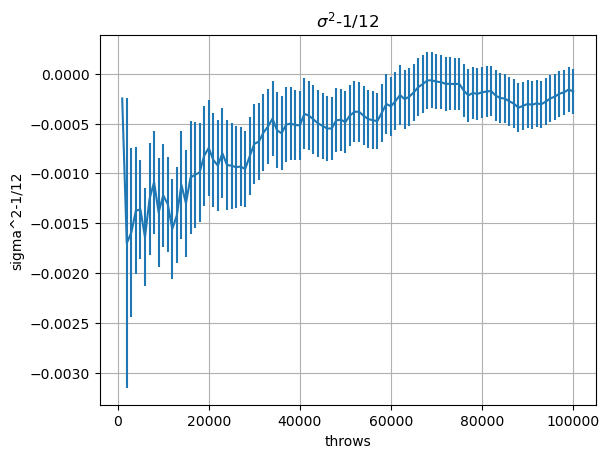

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#carico i dati
f, x, error = np.loadtxt("r_sigma.txt", delimiter=' ', unpack=True)
#creo il grafico
plt.figure()
plt.errorbar(x,f-1/12,yerr=error)
plt.xlabel('throws')
plt.ylabel('sigma^2-1/12')
plt.title(r'$\sigma^2$-1/12')
plt.grid(True)
plt.show()

Si noti come il valore finale con la sua incertezza rientra nel valore aspettato.

3. L'ipotesi fondamentale attraverso cui sono state calcolate queste quantità è che i numeri $r$ siano stati campionati da una distribuzione uniforme tra $0$ e $1$. In statistica però non si può dimostrare che certi dati sono stati campionati da una specifica distribuzione, tuttavia si può stimare la probabilità che essi non siano stati presi da una certa distribuzione, in questo caso la distribuzione uniforme causale tra $0$ e $1$. Se questa probabilità è bassa, allora si può rigettare tale ipotesi. A tal fine si utilizza il test del $\chi^2$. Per $j$ da $1$ a $100$ ho estratto $10^4$ numeri pseudocasuali da una distribuzione uniforme tra $0$ e $1$, calcolato i singoli $\chi^2_j$ e successivamente calcolato media e incertezza con metodo Monte-Carlo. 

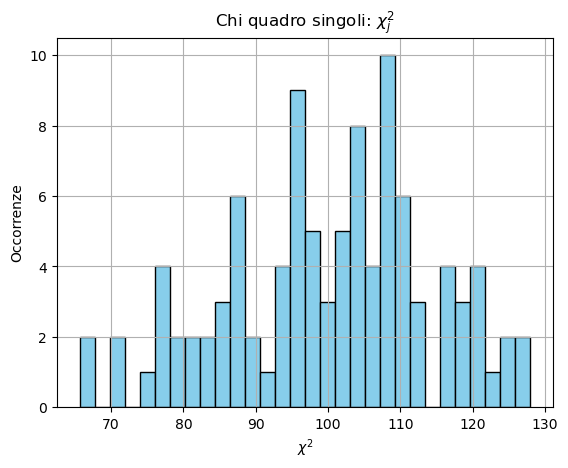

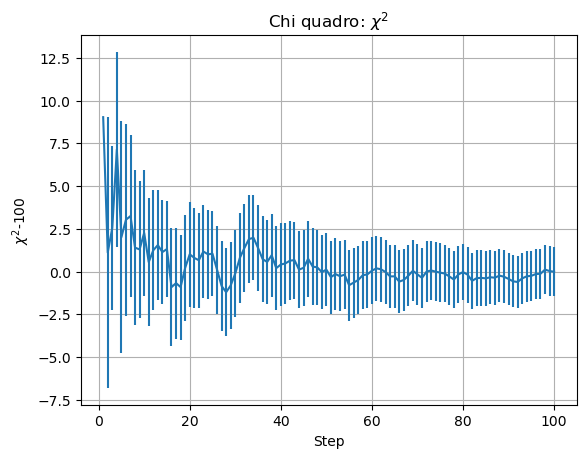

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#chiquadro singoli
#carico i dati
chi = np.loadtxt("chiquadro_singoli.txt", delimiter=' ', unpack=True)
#creo il grafico
plt.figure()
#creo l'istogramma riempiendolo coi dati
plt.hist(chi, bins=30,  color='skyblue', edgecolor='black')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Occorrenze')
plt.title(r'Chi quadro singoli: $\chi^2_j$')
plt.grid(True)
plt.show()

#chiquadro con medie cumulative e data blocking
f1, error, x1 = np.loadtxt("chiquadro.txt", delimiter=' ', unpack=True)
plt.figure()
plt.errorbar(x1,f1-100,yerr=error, linestyle='-')
plt.xlabel('Step')
plt.ylabel(r'$\chi^2$-100')
plt.title(r'Chi quadro: $\chi^2$')
plt.grid(True)
plt.show()


Si noti come per rigettare l'ipotesi che i numeri non siano campionati da una distribuzione uniforme casuale tra $0$ e $1$ non è necessario che il $\chi^2$ sia basso in assoluto perchè in questo caso non potremmo rigettarla dato che oscilla intorno a $100$. Ciò che conta per affermare che il set di numeri sia campionato da una distribuzione uniforme casuale è che il $\chi^2$ ottenuto sia paragonabile alla distribuzione teorica del $\chi^2$ con $99$ gradi di libertà. Se i valori osservati di $\chi^2$ oscillano intorno al valore atteso (uguale ai gradi di libertà) e rientrano nella regione di alta probabilità della distribuzione teorica, allora non abbiamo motivi per rigettare l’ipotesi di uniformità.
In altre parole, un $\chi^2$ vicino a $100$ è esattamente quello che ci si aspetta: non è “basso” o “alto” in senso assoluto, ma coerente con la fluttuazione statistica prevista. Pertanto possiamo affermare che il generatore di numeri casuali estrae numeri casuali uniformemnete tra $0$ e $1$.

## Esercizio 01.2
L'esercizio richiede di aggiungere alla distribuzione di probabilità uniforme tra $0$ e $1$, una generica distribuzione di probabilità esponenziale e una generica distribuzione di probabilità di Cauchy-Lorentz attraverso il metodo dell'inversione della cumulativa. Successivamente creare $4$ istogrammi per ogni distribuzione con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N$ pari a $1,2,10,100$ e $x_i$ variabile campionata dalla distribuzione utilizzata. 

1. Distribuzione uniforme :
$$
p(x) = 
\begin{cases}
1 & \text{se } 0 \le x \le 1 \\
0 & \text{altrimenti}
\end{cases}
$$

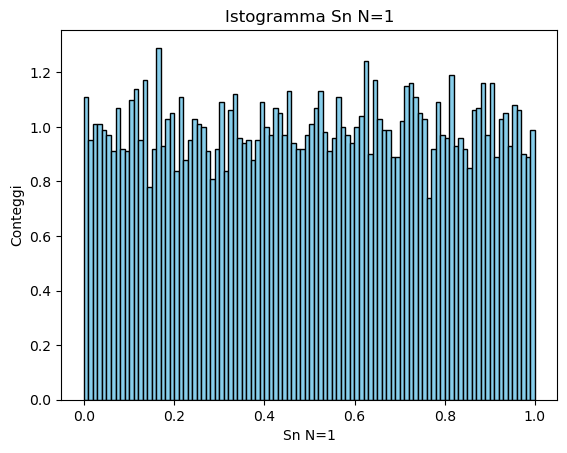

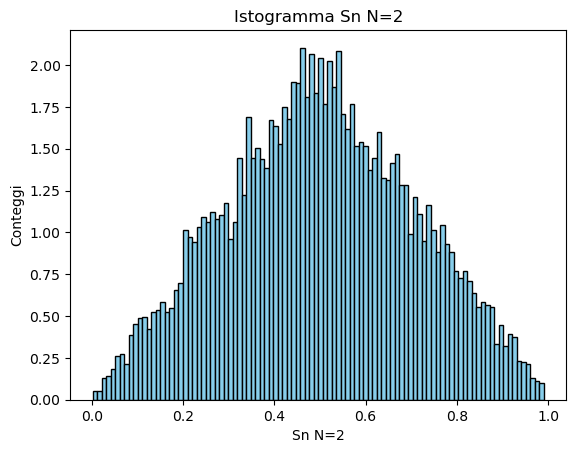

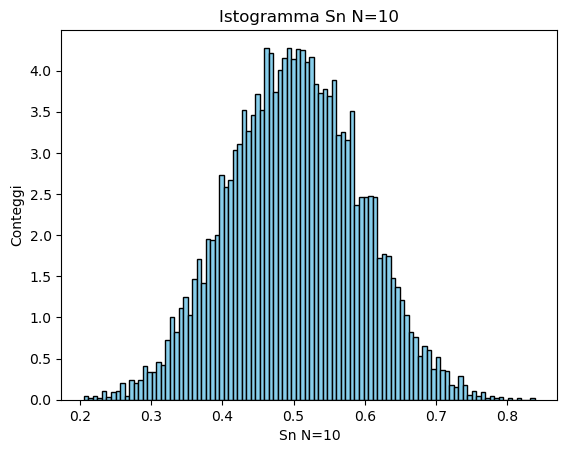

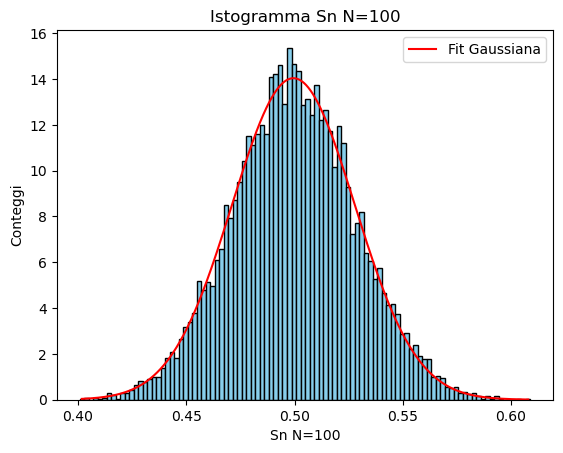

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Funzione gaussiana per il fit
def gaussiana(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Array con valori per etichettare i grafici: N = i + a[i]
a = np.array([1, 1, 8, 97])

# Caricamento dei dati 
std = np.loadtxt("standardisto.txt")

# Loop sui 4 histogrammi da plottare
for i in range(4):
    plt.figure()  

    # Solo per l'ultima colonna (i == 3) faccio anche il fit
    if i == 3:
        # Calcolo l'istogramma normalizzato (density=True)da cui prendere i dati per il fit
        counts, bins = np.histogram(std[:, i], bins=100, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2  # Centri dei bin per il fit presi a metà di ogni bin

        # Parametri iniziali per il fit:
        # - ampiezza (A): stimata come il valore massimo dell'istogramma (np.max(counts))
        # - media (mu): stimata come la media dei dati nella colonna (np.mean(std[:, i]))
        # - deviazione standard (sigma): stimata come la deviazione standard dei dati (np.std(std[:, i]))
        p0 = [np.max(counts), np.mean(std[:, i]), np.std(std[:, i])]

        # Fit dei dati con curva gaussiana
        #popt è array con i parametri ottimali trovati dal fit. _ indica che ignoro pcov e cioè la matrice di covarianza dei parametri del fit, serve per l'incertezza
        popt, _ = curve_fit(gaussiana, bin_centers, counts, p0=p0)

    # Istogramma dei dati normalizzato (density=true)
    plt.hist(std[:, i], bins=100, color='skyblue', edgecolor='black', density=True)

    # Plot del fit (solo per i == 3)
    if i == 3:
        x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000) #creo 1000 punti tra il centro del primo (0) e ultimo (-1) bin
        plt.plot(x_fit, gaussiana(x_fit, *popt), 'r-', label='Fit Gaussiana')
        plt.legend()

    # Etichette e salvataggio
    plt.ylabel('Conteggi')
    plt.xlabel(f'Sn N={i + a[i]}')
    plt.title(f'Istogramma Sn N={i + a[i]}')
    plt.show()


2. Distribuzione esponenziale:
$$p(x) = \lambda \exp(-\lambda x), x\in [0;+\infty]$$
L'inversa della cumulativa è:
$$
x = -\frac{1}{\lambda} \ln(1 - p), \quad \text{per } 0 < p < 1
$$

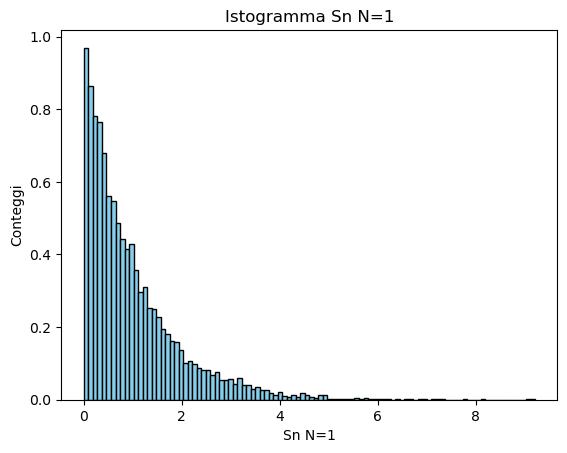

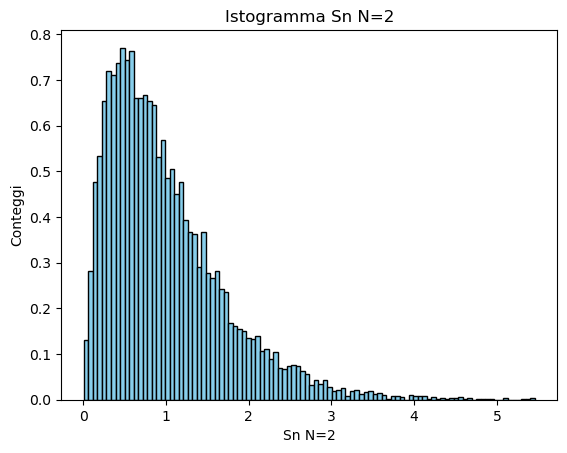

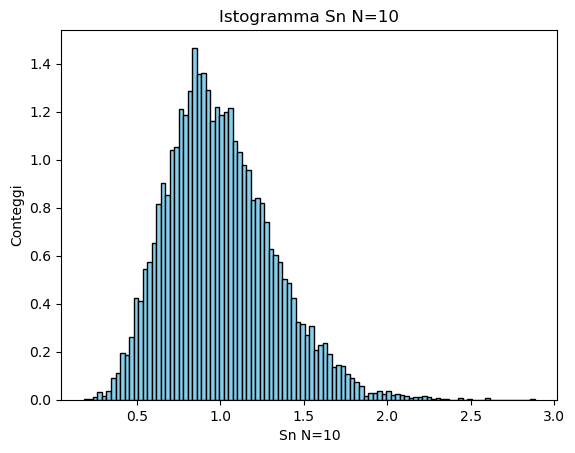

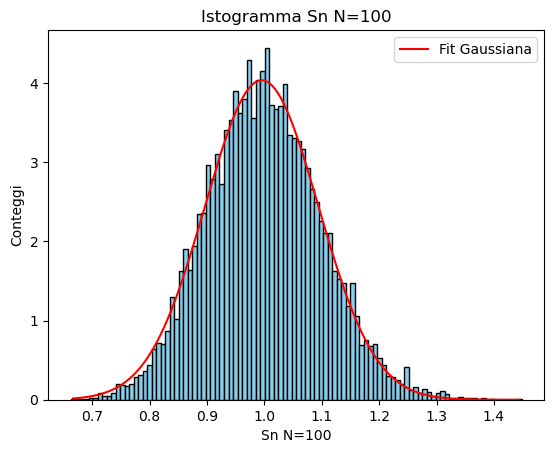

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#eseguo gli stessi procedimenti dello script con i dati di standardisto.txt
def gaussiana(x, A, mu, sigma):
  return A * np.exp(-(x - mu)**2 / (2 * sigma**2))
a = np.array([1, 1, 8, 97])
exp = np.loadtxt("expisto.txt")
for i in range(4):
 plt.figure() 
 if(i==3):
   counts, bins = np.histogram(exp[:,i], bins=100, density='true')
   bin_centers = (bins[:-1] + bins[1:]) / 2
   p0 = [np.max(counts), np.mean(exp[:,i]), np.std(exp[:,i])] 
   popt, _ = curve_fit(gaussiana, bin_centers, counts, p0=p0) 
 plt.hist(exp[:, i], bins=100, color='skyblue', edgecolor='black', density='true')  
 if(i==3):
    x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000) 
    plt.plot(x_fit, gaussiana(x_fit, *popt), 'r-', label='Fit Gaussiana') 
    plt.legend()
 plt.ylabel('Conteggi')  
 plt.xlabel(f'Sn N={i+a[i]}')  
 plt.title(f'Istogramma Sn N={i+a[i]}')  
 plt.show()


3. Distribuzione di Cauchy-Lorentz:
$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}, x\in [-\infty;+\infty]$$
L'inversa della cumulativa è:
$$
x = x_0 + \gamma \cdot \tan\left[ \pi \left( p - \frac{1}{2} \right) \right], \quad \text{per } 0 < p < 1
$$

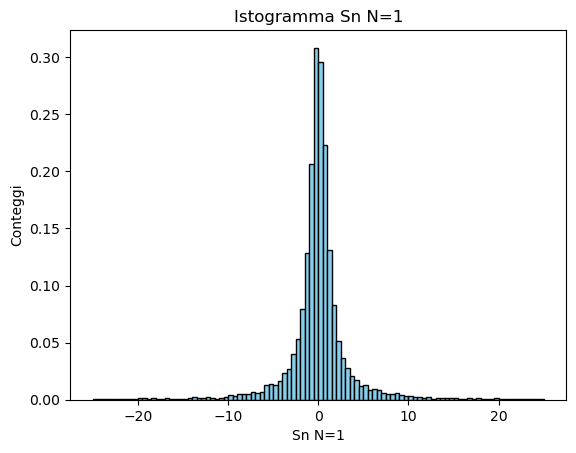

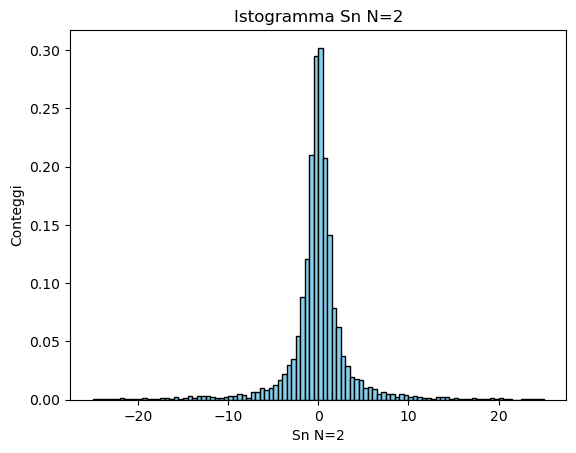

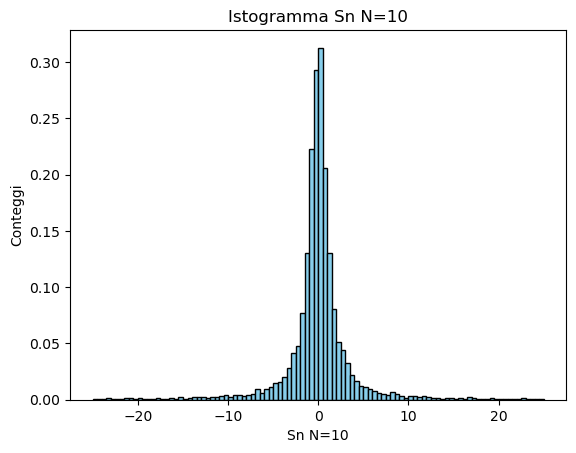

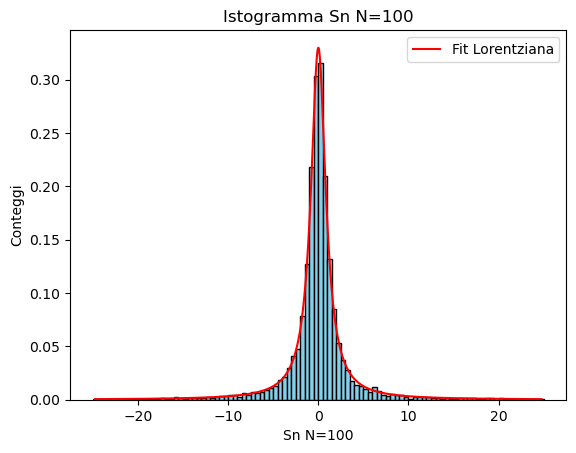

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#eseguo gli stessi procedimenti dello script con i dati di standardisto.txt, cambia stavolta la funzione da fittare

#Cauchy-Lorentz da fittare
def lorentziana(x, A, mu, gamma):
    return A * (1/np.pi) * (gamma / ((x - mu)**2 + gamma**2))

a = np.array([1, 1, 8, 97])
cauchy = np.loadtxt("cauchyisto.txt")
for i in range(4):
 plt.figure()  
 if(i==3):
   counts, bins = np.histogram(cauchy[:,i], bins=100, range=(-25,25),density='true')
   bin_centers = (bins[:-1] + bins[1:]) / 2
   p0 = [np.max(counts), np.median(cauchy[:, i]), (np.percentile(cauchy[:, i], 75) - np.percentile(cauchy[:, i], 25)) / 2] #np.percentile calcola l'ennesimo percentile, cioè il valore della x sotto il quale sta il N% dei dati. la stima di gamma fatta è l'IQR ( cioè l’intervallo che contiene il 50% centrale dei dati) diviso 2 
   popt, _ = curve_fit(lorentziana, bin_centers, counts, p0=p0)
 plt.hist(cauchy[:, i], range=(-25,25), bins=100, color='skyblue', edgecolor='black', density='true')  
 if(i==3):
    x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000) 
    plt.plot(x_fit, lorentziana(x_fit, *popt), 'r-', label='Fit Lorentziana') 
    plt.legend()
 plt.ylabel('Conteggi')  
 plt.xlabel(f'Sn N={i+a[i]}') 
 plt.title(f'Istogramma Sn N={i+a[i]}')  
 plt.show()


Nella distribuzione di probabilità uniforme tra $0$ e $1$ e nel caso della distribuzione di probabilità esponenziale per $N=100$ ho fittato una gaussiana verificando così il teorema del limite centrale. Esso afferma che la media della somma di $N$ variabili $X_i$ causali indipendenti identicamente distribuite secondo una certa $p(x)$ con media $\mu$ e varianza $\sigma^2$ finite tende ad avere una distribuzione Gaussiana, indipendentemente dalla forma della distribuzione originale. 
$$
S_N = \frac{1}{N} \sum_{i=1}^N X_i 
\;\xrightarrow[N \to \infty]{\text{in distribuzione}}\;
\mathcal{N}\!\big( \mu, \frac{\sigma^2}{N} \big)
$$
Nel caso della distribuzione uniforme tra $0$ e $1$ la media $\mu$ è pari a $\frac{1}{2}$ e la varianza $\sigma^2$ è pari a $\frac{1}{12}$ mentre nel caso della distrubuzione esponenziale la media è pari a $\frac{1}{\lambda}$ e la varianza è pari a $\frac{1}{\lambda^2}$.
La distribuzione di Cauchy-Lorentz non ha media e varianza ben definite dunque la verifica del teorema del limite centrale non è applicabile. $S_N$ anche per $N$ grande rimane una Cauchy-Lorentz.

## Esercizio 01.3
L'esercizio richiede di simulare l'esperimento di Buffon. In questo esperimento, un ago di lunghezza $L$ viene lanciato randomicamente su una griglia di linee orizzontali separati da una distanza $d$. La probabilità che l'ago intersechi una linea è dunque $P = 2L/\pi d$. In questo modo è possibile calcolare il $\pi$ da:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
$N_{thr}$ è il numero di lanci, $N_{hit}$ è il numero di volte in cui l'ago ha intersecato le linee della griglia. E' importante scegliere $d > L$ ma non $d >> L$ altrimenti $P<<1$.
Ho effettuato $10^4$ lanci per $100$ blocchi calcolando per ogni blocco $\frac{2LN_{thr}}{N_{hit}d}$, successivamente ho calcolato media e incertezza con metodo Monte-Carlo. E' fortemente consigliato non usare $\pi$ nella stima di $\pi$ tramite l'esperimento di Buffon, così al posto di utilizzare il valore di $\pi$ salvato nelle librerie di $C++$ ho stimato il suo valore attraverso la serie di Nilakantha:
$$
\pi = 3 + \sum_{n=1}^{\infty} \frac{4(-1)^{n+1}}{(2n)(2n+1)(2n+2)}
$$

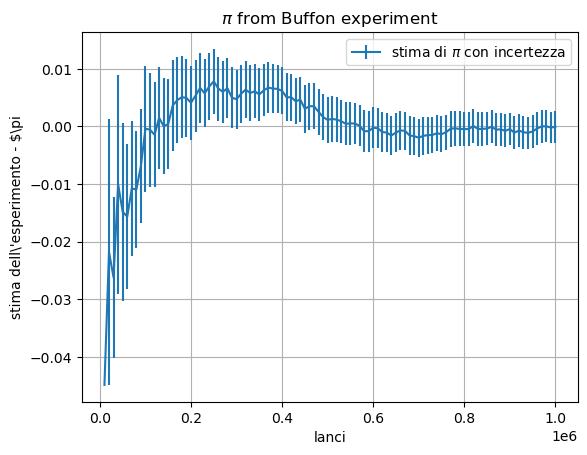

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

#carico i dati
x1, f1, error1 = np.loadtxt("Buffon.txt", delimiter=' ', unpack=True) 
#creo il grafico
plt.figure()
plt.errorbar(x1,f1-math.pi,yerr=error1, label=r'stima di $\pi$ con incertezza')
plt.xlabel('lanci')
plt.ylabel(r'stima dell\'esperimento - $\pi')
plt.title(r'$\pi$ from Buffon experiment')
plt.legend()
plt.grid(True)
plt.show()

# Note finali
Nel primo e nel terzo esercizio per calcolare l'incertezza sulla media ho utilizzato il data blocking. La varianza di una certa grandezza $A$ è definita come: $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
Attraverso il data blocking posso stimare la varianza e quindi  l'incertezza. Per stimare una certa quantità $A$ utilizzo $M$ Monte-Carlo step. Divido questo intervallo in $N$ blocchi indipendenti di lunghezza $\frac{M}{N}$ e per ogni blocco calcolo la media $A_i$ con $i=1,N$. Risulta quindi: $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
e pertanto l'incertezza sarà data da: 
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
E' importante sottolineare che l'incertezza del primo blocco non è stimabile e quindi è inizializzata a 0 come si può notare anche dai grafici.
$N$ può essere scelto arbitrariamente ma ci sono alcune importanti limitazioni. Se $N$ è troppo piccolo e quindi blocchi di lunghezza troppo grande ho poche stime indipendenti di $A_i$, la stima dell'incertezza sarà quindi imprecisa, soggetta a fluttuazioni e sovrastimata. Per $N$ troppo grande, dunque troppo vicino al valore di $M$, e quindi blocchi troppo piccoli, le stime di $A_i$ non sono molto buone a causa dei pochi valori nel blocco. Inoltre posso avere correlazioni residue tra valori successivi che violano l’ipotesi di blocchi statisticamente indipendenti e dunque sottostimano l'incertezza reale.
